<a href="https://colab.research.google.com/github/EmamulHossen/Fake_News_Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from zipfile import ZipFile

In [3]:
with ZipFile("/content/drive/MyDrive/Data/archive (1).zip","r") as zipobj:
  zipobj.extractall("drive/MyDrive/Data/text_data")

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Importing Modules**

In [5]:
import string
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,auc

**Load Data**

In [6]:
data=pd.read_csv("/content/drive/MyDrive/Data/text_data/WELFake_Dataset.csv")
text_column = 'text'
label_column = 'label'

In [7]:
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [8]:
data.shape

(72134, 4)

In [9]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

**As the title, subject and Unnamed: 0 will not going to be helpful in identification of the news. So, we can drop these column.**

In [10]:

data = data.drop(["title", 'Unnamed: 0'], axis = 1)

In [11]:
data

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...
72129,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [12]:
data.isnull().any()

text      True
label    False
dtype: bool

In [13]:
data.isnull().sum()

text     39
label     0
dtype: int64

In [14]:
data.dropna(inplace=True) #Drop all the Null/Misiing Values.

In [15]:
data.shape #After drop the null/missing value from the dataset the number of row is 72095 & the number of column is 2

(72095, 2)

In [16]:
data.duplicated().any() # In this dataset has duplicated value.

True

In [17]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
72129    False
72130    False
72131    False
72132    False
72133     True
Length: 72095, dtype: bool

In [18]:
data.drop_duplicates(data,inplace=True)

In [19]:
data.shape

(62719, 2)

In [20]:
data.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [21]:
data.tail()

,text,label
72127,An email released by WikiLeaks on Sunday appea...,1
72129,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [22]:
# Value Counts of Fake & Ham News
data["label"].value_counts()

0    34621
1    28098
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

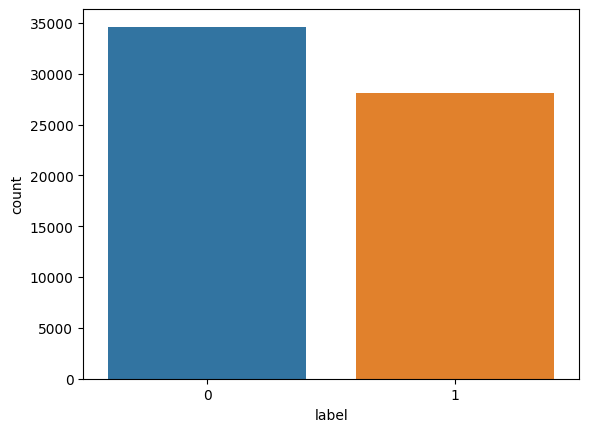

In [23]:
sns.countplot(data,x="label")

# **Some of the preprocessing Steps are:-**
1.**Removing punctuations like . , ! $( ) * % @**<br/>
2.**Removing Stop words**<br/>
3.**Lower casing.**<br/>
4.**Tokenization.**<br/>
5.**Stemming.**<br/>
6.**Lemmatization.**

In [24]:
data.text[0]

'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [25]:
data.text[100]

'(Reuters) - One person was shot at an anti-Trump demonstration in Portland on Saturday as protesters crossed the Morrison Bridge, police said.   “Everyone needs to leave the area immediately,” police said on Twitter, and they asked witnesses to come forward. '

In [26]:
data.text[4000]

"The Possible Identity of the 3 Ribs Bones of Contention \nDaniel 7 foretells a nation that will be on the earth just prior to the Second Coming of Jesus Christ, symbolized as a bear (Russia) with three ribs in its mouth. We will discuss the possible identity of the three ribs on today’s edition of End of the Age! Email (will not be published) (required) Website Sow a seed to help the Jewish people Follow Endtime Copyright © 2016 All Rights Reserved Endtime Ministries | End of the Age | Irvin Baxter Endtime Ministries, Inc. PO Box 940729 Plano, TX 75094 Toll Free: 1.800.363.8463 DON'T JUST READ THE NEWS... understand it from a biblical perspective. Your Information will never be shared with any third party. Get a 2-year subscription, normally $29, now just $20.15. ONLY 500 deals are still available. Offer available while supplies last or it expires on December 31, 2015. close We are a small non-profit that runs a high-traffic website, a daily TV and radio program, a bi-monthly magazine

In [27]:
#Checking stop words in English Language
stw=set(stopwords.words("english"))
stw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# **Remove Punctuation & Stopwords**

In [28]:
def preprocess_text(text):
    # Remove punctuation
    remove_punc = [char for char in text if char not in string.punctuation]
    clean_words = ''.join(remove_punc) # char joining

    #Remove stopwords
    text = ([word for word in clean_words.split() if word.lower() not in stw]) # stopword = stopwords.words('english')
    return text

In [29]:
data[text_column] = data[text_column].apply(preprocess_text)

In [30]:
data[text_column]

0        [comment, expected, Barack, Obama, Members, FY...
1                          [post, votes, Hillary, already]
2        [demonstrators, gathered, last, night, exercis...
3        [dozen, politically, active, pastors, came, pr...
4        [RS28, Sarmat, missile, dubbed, Satan, 2, repl...
                               ...                        
72127    [email, released, WikiLeaks, Sunday, appears, ...
72129    [WASHINGTON, Reuters, Hackers, believed, worki...
72130    [know, fantasyland, Republicans, never, questi...
72131    [Migrants, Refuse, Leave, Train, Refugee, Camp...
72132    [MEXICO, CITY, Reuters, Donald, Trump’s, comba...
Name: text, Length: 62719, dtype: object

# **Lemmatization**

In [31]:
lemmatizer=WordNetLemmatizer()


def lemmatize_text(text):
  lemmatized_text=' '.join([lemmatizer.lemmatize(word) for word in text])
  return lemmatized_text


data[text_column] = data[text_column].apply(lemmatize_text)

In [32]:
data[text_column]

0        comment expected Barack Obama Members FYF911 F...
1                                post vote Hillary already
2        demonstrator gathered last night exercising co...
3        dozen politically active pastor came private d...
4        RS28 Sarmat missile dubbed Satan 2 replace SS1...
                               ...                        
72127    email released WikiLeaks Sunday appears show f...
72129    WASHINGTON Reuters Hackers believed working Ru...
72130    know fantasyland Republicans never questioned ...
72131    Migrants Refuse Leave Train Refugee Camp Hunga...
72132    MEXICO CITY Reuters Donald Trump’s combative s...
Name: text, Length: 62719, dtype: object

# **TF-IDF Vectorizer**

In [33]:
vectorizer=TfidfVectorizer(max_features=50000)

x=vectorizer.fit_transform(data[text_column])
y=data[label_column]

# **Split the datase into train & Test**

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [35]:
x_train.shape


(43903, 50000)

In [36]:
x_test.shape

(18816, 50000)

In [37]:
y_train.shape

(43903,)

In [38]:
y_test.shape

(18816,)

# **Build Model**

In [39]:
models = [
    MultinomialNB(),
    BernoulliNB()
]

for model in models:
    model.fit(x_train, y_train)

    ypred = model.predict(x_test)
    ypred_proba = model.predict_proba(x_test)[:, 1]

    print(f"Model: {type(model).__name__}")
    print('Accuracy Score =',model.score(x_test, y_test))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, ypred))
    print("AUC Score:", roc_auc_score(y_test, ypred_proba))

    print('\n')

Model: MultinomialNB
Accuracy Score = 0.8670280612244898
Confusion Matrix:
[[9407 1026]
 [1476 6907]]
AUC Score: 0.9415192554836512


Model: BernoulliNB
Accuracy Score = 0.8106398809523809
Confusion Matrix:
[[7729 2704]
 [ 859 7524]]
AUC Score: 0.9244117634380735




# **Random Text**
Every time you're online, you are bombarded by pictures, articles, links and videos trying to tell their story. Unfortunately, not all of these stories are true. Sometimes they want you to click on another story or advertisement at their own site, other times they want to upset people for political reasons. These days it's so easy to share information. These stories circulate quickly, and the result is … fake news.

There is a range of fake news: from crazy stories which people easily recognise to more subtle types of misinformation. Experts in media studies and online psychology have been examining the fake news phenomenon. Read these tips, and don't get fooled!

# **Predictions**

In [40]:
random_text = input()

preprocessed_text = preprocess_text(random_text) # remove punctuation
lemmatized_text = lemmatize_text(preprocessed_text) # text scaling
text_vector = vectorizer.transform([lemmatized_text])

for model in models:
    prediction = model.predict(text_vector)
    print(f"Model: {type(model).__name__}")
    print("Prediction:", prediction)
    print('\n')

Every time you're online, you are bombarded by pictures, articles, links and videos trying to tell their story. Unfortunately, not all of these stories are true. Sometimes they want you to click on another story or advertisement at their own site, other times they want to upset people for political reasons. These days it's so easy to share information. These stories circulate quickly, and the result is … fake news.  There is a range of fake news: from crazy stories which people easily recognise to more subtle types of misinformation. Experts in media studies and online psychology have been examining the fake news phenomenon. Read these tips, and don't get fooled!
Model: MultinomialNB
Prediction: [1]


Model: BernoulliNB
Prediction: [1]


